# 05-10

## Lygčių sistemos
Šią pamoką stengėmės pakartoti ir pramokti lygčių sistemų sprendimą. Aptarėme, kaip reiktų interpretuoti vadovėlyje pateikto pavyzdžio sprendimą:

### Pavyzdžio 1 sprendimas

**Sąlyga**  
$\begin{cases} x+y+z=3 \\ -x + 2y + z = 9 \\ 2x+y+3z=3 \end{cases}$

**Žingsnis 1**  
$\begin{cases} \boxed{x = 3-y-z} \\ -(3-y-z) + 2y + z = 9 \\ 2(3-y-z)+y+3z=3 \end{cases}$

**Žingsnis 2a**  
$\begin{cases} \boxed{x = 3-y-z} \\ -3+y+z + 2y + z = 9 \\ 6-2y-2z+y+3z=3 \end{cases}$

**Žingsnis 2b**  
$\begin{cases} \boxed{x = 3-y-z} \\ -3+3y + 2z = 9 \\ 6-y+z=3 \end{cases}$

**Žingsnis 2c**  
$\begin{cases} \boxed{x = 3-y-z} \\ 3y + 2z = 12 \\ -y+z=-3 \end{cases}$

**Žingsnis 3**  
$\begin{cases} \boxed{x = 3-y-z} \\ 3y + 2(y-3) = 12 \\ \boxed{z=y-3} \end{cases}$

**Žingsnis 4a**  
$\begin{cases} \boxed{x = 3-y-z} \\ \boxed{z=y-3} \\ 3y + 2y-6 = 12 \end{cases}$

**Žingsnis 4b**  
$\begin{cases} \boxed{x = 3-y-z} \\ \boxed{z=y-3} \\ 5y = 18 \end{cases}$

**Žingsnis 4c**  
$\begin{cases} \boxed{x = 3-y-z} \\ \boxed{z=y-3} \\ \boxed{y = 3.6} \end{cases}$

**Žingsnis 5a**  
$\boxed{z=3.6-3=0.6}$

**Žingsnis 5a**  
$\boxed{x = 3 - 3.6 - 0.6 = -1.2}$

**Atsakymas**

$(x; y; z) = (-1.2; 3.6; 0.6)$

### Pavyzdžio 1 sprendimo aptarimas

Rašymo labai daug, bet žingsniai nesudėtingi. 
* **Žingsnyje 1** reikia išreikšti pirmoje lygtyje nežinomąjį $x$. Gaunasi apibraukta lygtis. Kitose lygtyse naudojamos gautos $x$ išraiškos vietoje $x$ kintamojo. 
* **Žingsniuose 2a, 2b, 2c** yra kiek galima pertvarkomos gautos lygtys. 
* Tada **žingsnyje 3** eiga kartojasi kaip ir žingsnyje 1: gauname apibrauktą $z$ išraišką ir ją naudojame vietoje $z$. 
* **Žingsniai 4a, 4b ir 4c** yra skirti kiek galima pertvarkyti naujai atsiradusią lygtį su tik vienu nežinomuoju $y$. Galiausiai pavyksta pertvarkyti taip, kad gaunasi sprendinys $\boxed{y = 3.6}$. 
* Kadangi $z$ priklauso tik nuo $y$, tai **žingsnyje 5a** $y$ reikšmės pilnai pakanka rasti $z$ reikšmei, o turint abejas $y$ ir $z$ reikšmes **žingsnyje 5b** randame $x$.

Svarbu perprasti sprendimo eigą: 

<IPython.core.display.Javascript object>


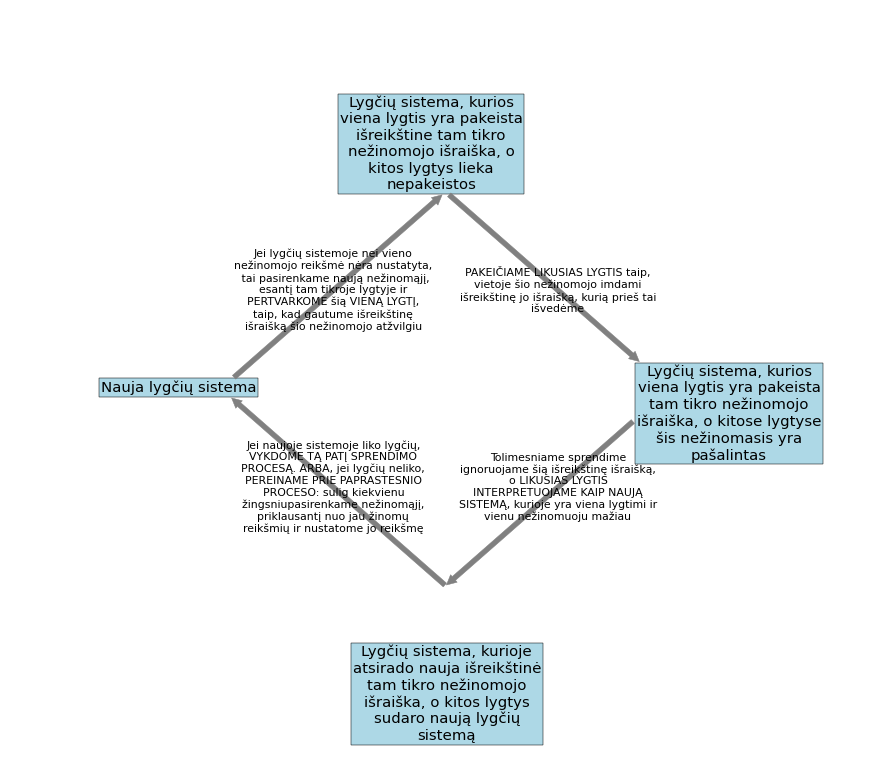

In [114]:
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
%matplotlib notebook


node_labels = {0: 'Nauja lygčių sistema', 
               1: 'Lygčių sistema, kurios viena lygtis yra pakeista išreikštine tam tikro nežinomojo išraiška, \
o kitos lygtys lieka nepakeistos',
               2: 'Lygčių sistema, kurios viena lygtis yra pakeista tam tikro nežinomojo išraiška, \
o kitose lygtyse šis nežinomasis yra pašalintas',
               3: 'Lygčių sistema, kurioje atsirado nauja išreikštinė tam tikro nežinomojo išraiška, \
o kitos lygtys sudaro naują lygčių sistemą'}
edge_labels = {(0, 1): 'Jei lygčių sistemoje nei vieno nežinomojo reikšmė nėra nustatyta,\n \
tai pasirenkame naują nežinomąjį, esantį tam tikroje lygtyje ir PERTVARKOME šią VIENĄ LYGTĮ, taip, \
kad gautume išreikštinę išraišką šio nežinomojo atžvilgiu',
               (1, 2): 'PAKEIČIAME LIKUSIAS LYGTIS taip, vietoje šio nežinomojo imdami išreikštinę jo išraišką, \
kurią prieš tai išvedėme',
               (2, 3): 'Tolimesniame sprendime ignoruojame šią išreikštinę išraišką, o \
LIKUSIAS LYGTIS INTERPRETUOJAME KAIP NAUJĄ SISTEMĄ, kurioje yra viena lygtimi \
ir vienu nežinomuoju mažiau',
               (3, 0): 'Jei naujoje sistemoje liko lygčių, VYKDOME TĄ PATĮ SPRENDIMO PROCESĄ. \
ARBA, jei lygčių neliko, PEREINAME PRIE PAPRASTESNIO PROCESO: sulig kiekvienu žingsniu\
pasirenkame nežinomąjį, priklausantį nuo jau žinomų reikšmių ir nustatome jo reikšmę'}
pos = {0:(0, 0), 1: (2, 2), 2: (4, 0), 3: (2, -2)}

def labeled_graph(node_labels, edge_labels, pos, offset=1):
    fig, ax = plt.subplots(figsize=(20, 20), dpi=40)
    node_annotations = dict()
    arrowstyle='simple, head_width=2, head_length=2, tail_width=1'
    
    for A in node_labels:
        node_annotations[A] = ax.annotate(node_labels[A], xy=pos[A], xycoords='data', size=20,
                                          ha="center", va="center", bbox=dict(facecolor = "lightblue"), 
                                          wrap=True, fontsize=30)
        node_annotations[A]._get_wrap_line_width = lambda : 200
        node_annotations[A].draggable()
        
    for A, B in edge_labels:
        ax.annotate("", xy=pos[B], xycoords='data', xytext=pos[A], textcoords='data',
                              arrowprops=dict(arrowstyle=arrowstyle, color="0.5",  # shrinkA=85, shrinkB=85,
                                              patchA=node_annotations[A],
                                              patchB=node_annotations[B],
                                              connectionstyle='arc3'),
                   ha='right', va='bottom')
        x, y = np.mean([pos[A], pos[B]], axis=0)
        txt = ax.text(x, y, edge_labels[A, B], ha='center', va='center', fontsize=22, wrap=True)
        txt._get_wrap_line_width = lambda : 200
        #txt.draggable()
        
    m1, m2 = np.min(list(pos.values()), axis = 0)
    M1, M2 = np.max(list(pos.values()), axis = 0)
    plt.xlim(m1-offset, M1+offset)
    plt.ylim(m2-offset, M2+offset)
    plt.axis('off')
    plt.show()

labeled_graph(node_labels, edge_labels, pos, offset=1)

$x \cdot x = 3$

$x + x = 3$

$x \cdot x \cdot x \cdot x \cdot x \cdot x \cdot x\cdot x\cdot x\cdot x\cdot x\cdot x = 2$

$x ^ {12} = 2$

In [116]:
import math


In [118]:
2**(1/12)

1.0594630943592953

In [120]:
100*1.06*1.06

112.36

In [121]:
6/100 * 6

0.36